In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
fs = 200
f_nyq = fs / 2


### 40 Hz
R1 = 51kΩ <br>
R2 = 10kΩ <br>
C1 = 0.056uF <br>
C2 = 0.51uF <br>

R3 = 20kΩ <br>
R4 = 180kΩ <br>

fc = 41.7 Hz <br>
Q = 0.706 <br>

In [3]:
with open("aaf_bode_40.csv", "r") as file:
    raw_text = file.readlines()

data_40 = []
for string in raw_text:
    data_40.append(string.split(','))
    
data_40 = pd.DataFrame(data_40[1:], columns=data_40[0], dtype=float)
data_40.describe()


,Frequency[Hz],Magnitude[dB],GroupDelay[sec]\n
count,299.000000,299.000000,299.000000
mean,28.034246,16.772093,0.004788
std,43.947503,6.636625,0.001746
min,0.200000,-6.446148,0.000263
25%,1.111882,18.340198,0.005406
50%,6.180591,19.997292,0.005412
75%,34.360445,19.999978,0.005559
max,190.998517,19.999999,0.006511


In [4]:
f_40 = np.array(data_40.iloc[:, 0])
Hf_40 = np.array(data_40.iloc[:, 1])
gd_40 = np.array(data_40.iloc[:, 2])


/var/folders/t7/3c56yrcd6z52r90s520zr8mr0000gn/T/ipykernel_99127/3975499028.py:11: RuntimeWarning: invalid value encountered in log10
  plt.plot(f_40, 20*np.log10(Hf_40))


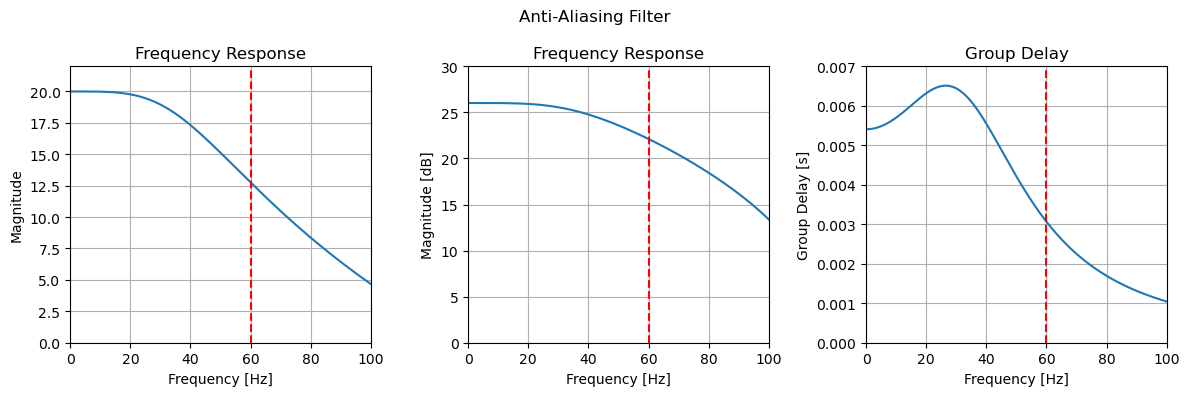

In [5]:
fig_40, axs_40 = plt.subplots(1, 3, tight_layout=True, figsize=[12, 4])
fig_40.suptitle("Anti-Aliasing Filter")

plt.sca(axs_40[0])
plt.plot(f_40, Hf_40)
plt.ylim([0, 22])
plt.ylabel("Magnitude")
plt.title("Frequency Response")

plt.sca(axs_40[1])
plt.plot(f_40, 20*np.log10(Hf_40))
plt.ylim([0, 30])
plt.ylabel("Magnitude [dB]")
plt.title("Frequency Response")

plt.sca(axs_40[2])
plt.plot(f_40, gd_40)
plt.ylim([0, 0.007])
plt.ylabel("Group Delay [s]")
plt.title("Group Delay")

for ax in axs_40:
    plt.sca(ax)
    plt.xlim([0, f_nyq])
    plt.xlabel("Frequency [Hz]")
    plt.axvline(60, linestyle='dashed', color='r')
    plt.grid(True)


### 100 [Hz]
R1 = 51kΩ <br>
R2 = 9.1kΩ <br>
C1 = 0.022uF <br>
C2 = 0.22uF <br>

R3 = 20kΩ <br>
R4 = 200kΩ <br>

fc = 106 Hz <br>
Q = 0.749 <br>
A = 10 <br>

In [6]:
with open("aaf_bode_100.csv", "r") as file:
    raw_text = file.readlines()

data_100 = []
for string in raw_text:
    data_100.append(string.split(','))
    
data_100 = pd.DataFrame(data_100[1:], columns=data_100[0], dtype=float)
data_100.describe()


,Frequency[Hz],Magnitude[dB],GroupDelay[sec]\n
count,299.000000,299.000000,299.000000
mean,28.034246,20.221089,0.002047
std,43.947503,1.870192,0.000288
min,0.200000,10.506668,0.000767
25%,1.111882,20.827860,0.002002
50%,6.180591,20.828063,0.002005
75%,34.360445,20.833857,0.002086
max,190.998517,20.878656,0.002629


In [7]:
f_100 = np.array(data_100.iloc[:, 0])
Hf_100 = np.array(data_100.iloc[:, 1])
gd_100 = np.array(data_100.iloc[:, 2])


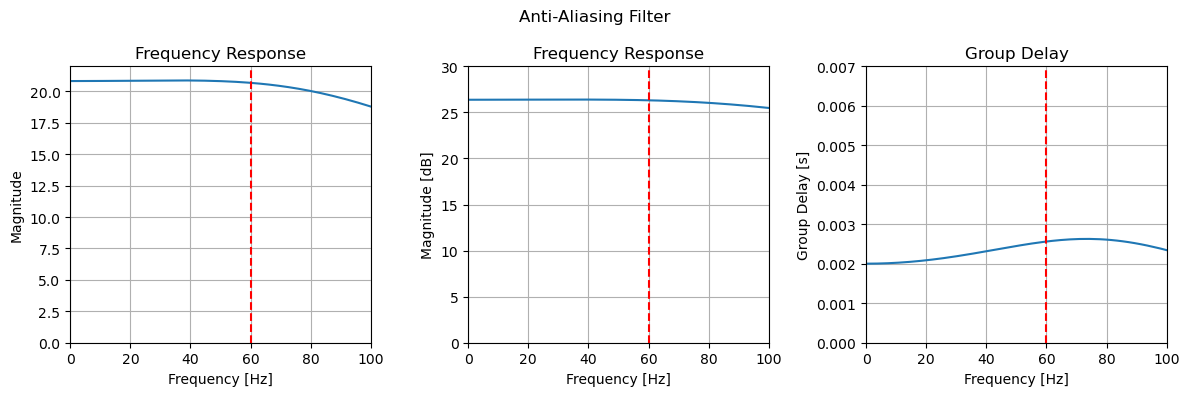

In [8]:
fig_100, axs_100 = plt.subplots(1, 3, tight_layout=True, figsize=[12, 4])
fig_100.suptitle("Anti-Aliasing Filter")

plt.sca(axs_100[0])
plt.plot(f_100, Hf_100)
plt.ylim([0, 22])
plt.ylabel("Magnitude")
plt.title("Frequency Response")

plt.sca(axs_100[1])
plt.plot(f_100, 20*np.log10(Hf_100))
plt.ylim([0, 30])
plt.ylabel("Magnitude [dB]")
plt.title("Frequency Response")

plt.sca(axs_100[2])
plt.plot(f_100, gd_100)
plt.ylim([0, 0.007])
plt.ylabel("Group Delay [s]")
plt.title("Group Delay")

for ax in axs_100:
    plt.sca(ax)
    plt.xlim([0, f_nyq])
    plt.xlabel("Frequency [Hz]")
    plt.axvline(60, linestyle='dashed', color='r')
    plt.grid(True)
